# gw2 2:1 Bifurcation Diagrams

I'm trying to figure out why the 1d bifurcation diagram in the full model is "flipped" compared to the reduced model.

It is unclear if it's in how I set up the model equations, or if there is a calculation error.

The homogeneous case works well enough. but with even a tiny bit of heterogeneity, the solutions don't match for small epsilon.

Well it appears that the "flip" was due to 1. not including delta in the psi calculations, and 2. there is a qualitative match in the dynamics for sufficiently small epsilon, consistent with first-order averaging. I've checked the same dynamics using the higher-order response functions and the dynamics are faithfully reproduced. so seeing as how the only first-order approximation is the averaging, I believe it's the averaging that's limiting the accuracy here.

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path to lib
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import gw2

from lib.util import (get_phase, freq_est, get_tongue_1d, pl_exist_1d, 
get_period, bif1d, follow_phase_diffs, phase_lock_r3d, follow_locking_3d, 
get_initial_phase_diff_c, get_period)

from lib.rhs import _redu_c, _full, _redu_full
from lib.rhs import _redu_3dc_thal as _redu_3dc

from lib.plot_util import add_diagram_1d_scatter, quick_plot_combined


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-8,'atol':1e-8,'method':'LSODA'}

In [3]:
pd1 = {'v1':.84,'v2':.42,'v4':.35,'v6':.35,'v8':1,
           'k1':1,'k2':1,'k3':.7,'k4':1,'k5':.7,
           'k6':1,'k7':.35,'k8':1,'K':0.5,'kc':1,
           'n':6,'L':0,'eps':0,'del':0,'om':1,'om_fix':1}

In [4]:
kws1 = {'var_names':['x','y','z','v'],
        'pardict':pd1,
        'rhs':gw2.rhs,
        'coupling':gw2.coupling,
        'init':np.array([.3882,.523,1.357,.4347,24.2]),
        'TN':10000,
        'trunc_order':3,
        'z_forward':False,
        'i_forward':[False,True,False,False,False,False,False,False],
        'i_bad_dx':[False,True,False,False,False,False,False,False],
        'max_iter':50,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':0.5}

## Defs

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-9,'atol':1e-9}

In [6]:
etup21 = (.001,.1,200)
eps_list21r = np.linspace(*etup21)

In [7]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [8]:
system1 = rsp(idx=0,model_name='gw0',**kws1)
system2 = rsp(idx=1,model_name='gw1',**kws1)

mkdir ./data/gw0/
* Loading LC data...
self.T 6.283185307179586 omfix 3.8590183230656914
* Loading monodromy...
* Floquet Exponent kappa =-0.15846659975489297
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...
mkdir ./data/gw1/
* Loading LC data...
self.T 6.283185307179586 omfix 3.8590183230656914
* Loading monodromy...
* Floquet Exponent kappa =-0.15846659975489297
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [9]:
kw_nm = {'system1':system1,'system2':system2,'_n':('om0',2),'_m':('om1',1),
        'NH':2048,'save_fig':False}

# del=0.0

In [10]:
del21_p0 = 0
a21_p0 = nm.nmCoupling(**kw_nm, del1=del21_p0)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


### Get Branches Full

In [11]:
kw_p0 = {'a':a21_p0,'del1':del21_p0,'recompute':False,'bifdir':'bif1d_gw2/',
        '_full_rhs':_full}

In [12]:
data_p0_list = []

In [13]:
in_dicts = [dict(init=4,eps_init=0.01,eps_final=0.0775,deps=.005),
               dict(init=4,eps_init=0.01,eps_final=0.0005,deps=-.001),
               dict(init=2,eps_init=0.08,eps_final=0.11,deps=.01),
               dict(init=2,eps_init=0.08,eps_final=0.04, deps=-.005)]

In [14]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0)
    data_p0_list.append(dat)

fname1 td_branch_init=4_nm=21_del=0_ei=0.01_ef=0.0775_de=0.005.txt
fname2 ts_branch_init=4_nm=21_del=0_ei=0.01_ef=0.0775_de=0.005.txt
fname1 td_branch_init=4_nm=21_del=0_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=0_ei=0.01_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=0_ei=0.08_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=0_ei=0.08_ef=0.11_de=0.01.txt
fname1 td_branch_init=2_nm=21_del=0_ei=0.08_ef=0.04_de=-0.005.txt
fname2 ts_branch_init=2_nm=21_del=0_ei=0.08_ef=0.04_de=-0.005.txt


In [15]:
# save hyperparameters
fname = kw_p0['bifdir']+'hyper_gw2_21_p0.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [16]:
data_r3d_p0_list = []

In [17]:
# find init for this branch mid
_,init = phase_lock_r3d([4,0,0],a21_p0,.01,_redu_3dc)
print(init)

t_diff 4.34237720262784710, Y=[ 4.3423772  -0.01415792 -0.01768366]                                              
[ 4.3424 -0.0142 -0.0177]


In [18]:
# f
dat = follow_locking_3d(init,a21_p0,(.01,.15,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [19]:
# b
dat = follow_locking_3d(init,a21_p0,(.01,.005,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

## Plot

eps_min 0.024999999999999998


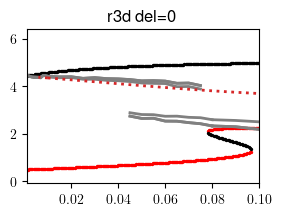

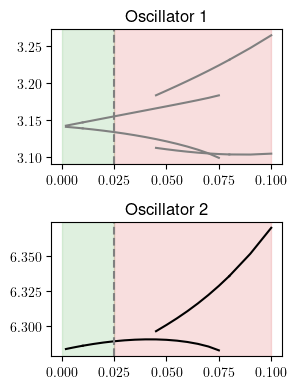

In [20]:
quick_plot_combined(a21_p0,
                    kw_f={'data_list':data_p0_list},
                    kw_r3d={'data_list':data_r3d_p0_list},
                    kw_r={'etup':etup21})

## Sims

In [21]:
# coupling and init
eps21_p0 = 0.0
th_init21_p0 = 2

In [22]:
# sim params
dt = .01;T_p04=1000
t21_p0 = np.arange(0,T_p04,dt)
args21_p0 = {'args':(a21_p0,eps21_p0,del21_p0),
             't_eval':t21_p0,**kw_sim,'dense_output':True}

In [23]:
# initialize and run full
y0a = a21_p0.system1.lc['dat'][int((th_init21_p0/(2*np.pi)) * a21_p0.system1.TN),:]
y0b = a21_p0.system2.lc['dat'][int((0/(2*np.pi)) * a21_p0.system2.TN),:]

y0_p04 = np.array([y0a,y0b]).flatten()

solf21_p0 = solve_ivp(_full,[0,t21_p0[-1]],
                        y0_p04, **args21_p0)

In [24]:
solr21_p0 = solve_ivp(_redu_c,[0,t21_p0[-1]],
                     [th_init21_p0],**args21_p0)

In [25]:
# solr12b_p04 = solve_ivp(_redu_3dc,[0,t21_p0[-1]],
#                     [th_init21_p0,0,0],**args21_p0)

In [26]:
tp12a_p04, phase12a_p04 = get_phase(t21_p0,solf21_p0.y.T[:,:4],
                            skipn=50,system1=a21_p0.system1)
tp12b_p04, phase12b_p04 = get_phase(t21_p0,solf21_p0.y.T[:,4:],
                            skipn=50,system1=a21_p0.system2)

(-0.5, 6.783185307179586)

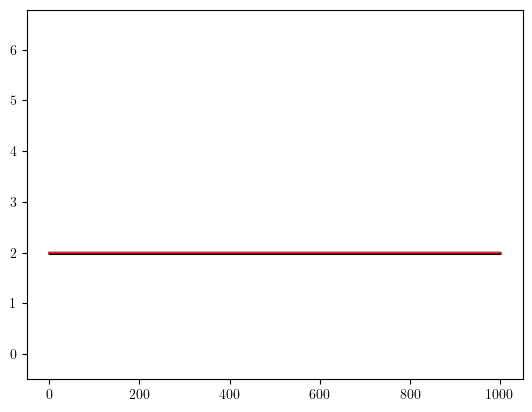

In [27]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p04 - a21_p0.om*phase12b_p04,2*np.pi)
axs.scatter(tp12a_p04,y,s=1,alpha=.5,color='black')

axs.plot(t21_p0,np.mod(solr21_p0.y.T,2*np.pi),
         color='tab:red')

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.0002

In [28]:
del21_p0002 = 0.0002
a21_p0002 = nm.nmCoupling(**kw_nm, del1=del21_p0002)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


In [29]:
print(a21_p0002.system1.p['fnames_data'])

['./data/gw0/p_data_ord=0_NP=2048_NH=2048_piter=4_n=2_m=1_f=False_de=0.0002.txt', './data/gw0/p_data_ord=1_NP=2048_NH=2048_piter=4_n=2_m=1_f=False_de=0.0002.txt', './data/gw0/p_data_ord=2_NP=2048_NH=2048_piter=4_n=2_m=1_f=False_de=0.0002.txt', './data/gw0/p_data_ord=3_NP=2048_NH=2048_piter=4_n=2_m=1_f=False_de=0.0002.txt']


### Get Branches Full

In [30]:
kw_p0002 = {'a':a21_p0002,'del1':del21_p0002,'recompute':False,
            'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [31]:
data_p0002_list = []

In [32]:
in_dicts = [dict(init=4,eps_init=0.01,eps_final=0.08,deps=.005),
                  dict(init=4,eps_init=0.01,eps_final=0.0005,deps=-.001),
                  dict(init=2,eps_init=0.08,eps_final=0.11,deps=.01),
                  dict(init=2,eps_init=0.08,eps_final=0.03,deps=-.005)]

In [33]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0002)
    data_p0002_list.append(dat)

fname1 td_branch_init=4_nm=21_del=0.0002_ei=0.01_ef=0.08_de=0.005.txt
fname2 ts_branch_init=4_nm=21_del=0.0002_ei=0.01_ef=0.08_de=0.005.txt
fname1 td_branch_init=4_nm=21_del=0.0002_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=0.0002_ei=0.01_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=0.0002_ei=0.08_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=0.0002_ei=0.08_ef=0.11_de=0.01.txt
fname1 td_branch_init=2_nm=21_del=0.0002_ei=0.08_ef=0.03_de=-0.005.txt
fname2 ts_branch_init=2_nm=21_del=0.0002_ei=0.08_ef=0.03_de=-0.005.txt


In [34]:
# save hyperparameters
fname = kw_p0['bifdir']+'hyper_gw2_21_p0002.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [35]:
data_r3d_p0002_list = []

In [36]:
# find init for this branch mid
_,init = phase_lock_r3d([4,0,0],a21_p0002,.01,_redu_3dc)
print(init)

t_diff 4.41271218061940811, Y=[ 4.41271218 -0.01367204 -0.01731887]                                              
[ 4.4127 -0.0137 -0.0173]


t_diff 4.412712180619408
[ 4.4127 -0.0137 -0.0173]


In [37]:
# f
dat = follow_locking_3d(init,a21_p0002,(.01,.15,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0002_list.append(dat)

In [38]:
# b
dat = follow_locking_3d(init,a21_p0002,(.01,.005,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0002_list.append(dat)

## Plot

eps_min 0.03


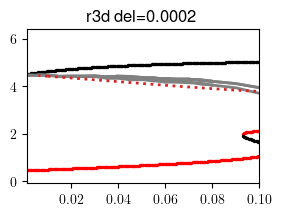

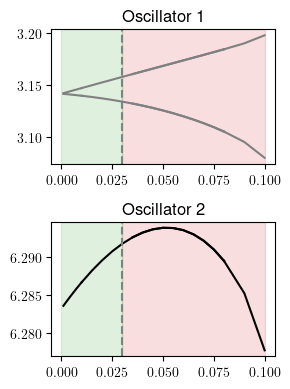

In [39]:
quick_plot_combined(a21_p0002,
                    kw_f={'data_list':data_p0002_list},
                    kw_r3d={'data_list':data_r3d_p0002_list},
                    kw_r={'etup':etup21})

# del=0.0004

In [40]:
del21_p0004 = 0.0004
a21_p0004 = nm.nmCoupling(**kw_nm, del1=del21_p0004)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


### Get Branches Full

In [41]:
kw_p0004 = {'a':a21_p0004,'del1':del21_p0004,'recompute':False,
            'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [42]:
data_p0004_list = []

In [43]:
in_dicts = [dict(init=4,eps_init=0.01,eps_final=0.11,deps=.01),
                  dict(init=4,eps_init=0.01,eps_final=0.0005,deps=-.001),
                  dict(init=2,eps_init=0.08,eps_final=0.11,deps=.01),
                  dict(init=2,eps_init=0.08,eps_final=0.025,deps=-.005)]

In [44]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0004)
    data_p0004_list.append(dat)

fname1 td_branch_init=4_nm=21_del=0.0004_ei=0.01_ef=0.11_de=0.01.txt
fname2 ts_branch_init=4_nm=21_del=0.0004_ei=0.01_ef=0.11_de=0.01.txt
fname1 td_branch_init=4_nm=21_del=0.0004_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=0.0004_ei=0.01_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=0.0004_ei=0.08_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=0.0004_ei=0.08_ef=0.11_de=0.01.txt
fname1 td_branch_init=2_nm=21_del=0.0004_ei=0.08_ef=0.025_de=-0.005.txt
fname2 ts_branch_init=2_nm=21_del=0.0004_ei=0.08_ef=0.025_de=-0.005.txt


In [45]:
# save hyperparameters
fname = kw_p0['bifdir']+'hyper_gw2_21_p0004.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [46]:
data_r3d_p0004_list = []

In [47]:
# find init for this branch mid
_,init = phase_lock_r3d([5,0,0],a21_p0004,.01,_redu_3dc)
print(init)

t_diff 4.47620028415316453, Y=[ 4.47620028 -0.01323761 -0.01695615]                                              
[ 4.4762 -0.0132 -0.017 ]


t_diff 4.4762002841531645
[ 4.4762 -0.0132 -0.017 ]


In [48]:
# f
dat = follow_locking_3d(init,a21_p0004,(.01,.1,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0004_list.append(dat)

In [49]:
# b
dat = follow_locking_3d(init,a21_p0004,(.01,.005,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0004_list.append(dat)

## Plot

eps_min 0.029999999999999957


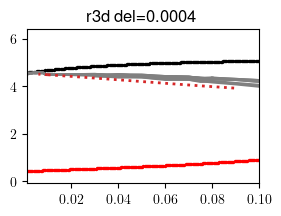

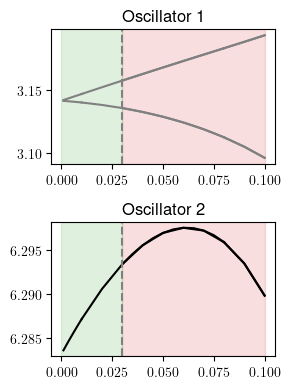

In [50]:
quick_plot_combined(a21_p0004,
                    kw_f={'data_list':data_p0004_list},
                    kw_r3d={'data_list':data_r3d_p0004_list},
                    kw_r={'etup':etup21})

# del=0.001

In [51]:
del21_p001 = 0.001
a21_p001 = nm.nmCoupling(**kw_nm, del1=del21_p001)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


### Get Branches Full

In [52]:
kw_p001 = {'a':a21_p001,'del1':del21_p001,'recompute':False,
            'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [53]:
data_p001_list = []

In [54]:
in_dicts = [dict(init=4,eps_init=0.01,eps_final=0.11,deps=.01),
                 dict(init=4,eps_init=0.01,eps_final=0.0005,deps=-.001),
                 dict(init=2,eps_init=0.08,eps_final=0.11,deps=.01),
                 dict(init=2,eps_init=0.08,eps_final=0.025,deps=-.005)]

In [55]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p001)
    data_p001_list.append(dat)

fname1 td_branch_init=4_nm=21_del=0.001_ei=0.01_ef=0.11_de=0.01.txt
fname2 ts_branch_init=4_nm=21_del=0.001_ei=0.01_ef=0.11_de=0.01.txt
fname1 td_branch_init=4_nm=21_del=0.001_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=0.001_ei=0.01_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=0.001_ei=0.08_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=0.001_ei=0.08_ef=0.11_de=0.01.txt
fname1 td_branch_init=2_nm=21_del=0.001_ei=0.08_ef=0.025_de=-0.005.txt
fname2 ts_branch_init=2_nm=21_del=0.001_ei=0.08_ef=0.025_de=-0.005.txt


In [56]:
# save hyperparameters
fname = kw_p001['bifdir']+'hyper_gw2_21_p001.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [57]:
data_r3d_p001_list = []

In [58]:
# find init for this branch mid
_,init = phase_lock_r3d([5,0,0],a21_p001,.01,_redu_3dc)
print(init)

t_diff 4.64246397697358-10, Y=[ 4.64246398 -0.01212603 -0.01586744]                                              
[ 4.6425 -0.0121 -0.0159]


t_diff 4.4762002841531645
[ 4.4762 -0.0132 -0.017 ]


In [59]:
# f
dat = follow_locking_3d(init,a21_p001,(.01,.1,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p001_list.append(dat)

In [60]:
# b
dat = follow_locking_3d(init,a21_p001,(.01,.005,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p001_list.append(dat)

## Plot

eps_min 0.03499999999999996


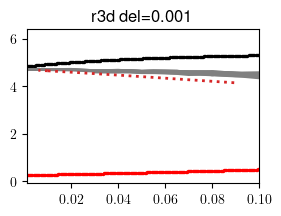

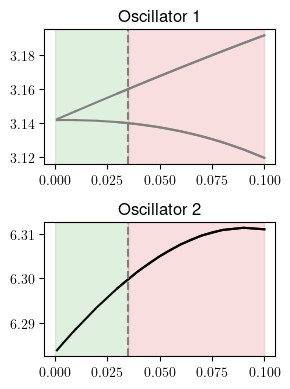

In [61]:
quick_plot_combined(a21_p001,
                    kw_f={'data_list':data_p001_list},
                    kw_r3d={'data_list':data_r3d_p001_list},
                    kw_r={'etup':etup21})

# del=0.002

In [62]:
del21_p002 = 0.002
a21_p002 = nm.nmCoupling(**kw_nm, del1=del21_p002)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


### Get Branches Full

In [63]:
kw_p002 = {'a':a21_p002,'del1':del21_p002,'recompute':False,
            'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [64]:
data_p002_list = []

In [65]:
in_dicts = [dict(init=5,eps_init=0.01,eps_final=0.11,deps=.01),
                 dict(init=5,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [66]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p002)
    data_p002_list.append(dat)

fname1 td_branch_init=5_nm=21_del=0.002_ei=0.01_ef=0.11_de=0.01.txt
fname2 ts_branch_init=5_nm=21_del=0.002_ei=0.01_ef=0.11_de=0.01.txt
fname1 td_branch_init=5_nm=21_del=0.002_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=5_nm=21_del=0.002_ei=0.01_ef=0.0005_de=-0.001.txt


In [67]:
# save hyperparameters
fname = kw_p002['bifdir']+'hyper_gw2_21_p002.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [68]:
data_r3d_p002_list = []

In [69]:
# find init for this branch mid
_,init = phase_lock_r3d([5,0,0],a21_p002,.01,_redu_3dc)
print(init)

t_diff 4.88365754756333309, Y=[ 4.88365755 -0.01058412 -0.01397829]                                              
[ 4.8837 -0.0106 -0.014 ]


t_diff 4.4762002841531645
[ 4.4762 -0.0132 -0.017 ]


In [70]:
# f
dat = follow_locking_3d(init,a21_p002,(.01,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [71]:
# b
dat = follow_locking_3d(init,a21_p002,(.01,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

## Plot

eps_min 0.060000000000000005


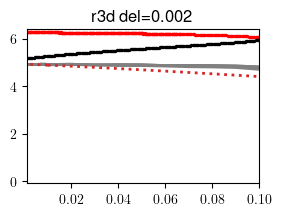

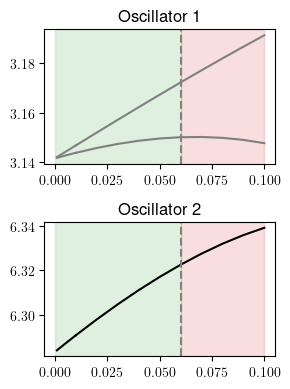

In [72]:
quick_plot_combined(a21_p002,
                    kw_f={'data_list':data_p002_list},
                    kw_r3d={'data_list':data_r3d_p002_list},
                    kw_r={'etup':etup21})

# ==NEGATIVE==

# del=-0.0002

In [73]:
del21_p0002b = -0.0002
a21_p0002b = nm.nmCoupling(**kw_nm, del1=del21_p0002b)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


### Get Branches Full

In [74]:
kw_p0002b = {'a':a21_p0002b,'del1':del21_p0002b,'recompute':False,
             'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [75]:
data_p0002b_list = []

In [76]:
in_dicts = [dict(init=4,eps_init=0.01,eps_final=0.08,deps=.005),
            dict(init=4,eps_init=0.01,eps_final=0.0005,deps=-.001),
            dict(init=2,eps_init=0.08,eps_final=0.11,deps=.01),
            dict(init=2,eps_init=0.08,eps_final=0.03,deps=-.005)]

In [78]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0002b)
    data_p0002b_list.append(dat)

fname1 td_branch_init=4_nm=21_del=-0.0002_ei=0.01_ef=0.08_de=0.005.txt
fname2 ts_branch_init=4_nm=21_del=-0.0002_ei=0.01_ef=0.08_de=0.005.txt
fname1 td_branch_init=4_nm=21_del=-0.0002_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=-0.0002_ei=0.01_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=-0.0002_ei=0.08_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=-0.0002_ei=0.08_ef=0.11_de=0.01.txt
fname1 td_branch_init=2_nm=21_del=-0.0002_ei=0.08_ef=0.03_de=-0.005.txt
fname2 ts_branch_init=2_nm=21_del=-0.0002_ei=0.08_ef=0.03_de=-0.005.txt


In [79]:
# save hyperparameters
fname = kw_p0002b['bifdir']+'hyper_gw2_21_p0002b.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [80]:
data_r3d_p0002b_list = []

In [81]:
# find init for this branch mid
_,init = phase_lock_r3d([4,0,0],a21_p0002b,.01,_redu_3dc)
print(init)

t_diff 4.26162439710210910, Y=[ 4.2616244  -0.01471897 -0.01805194]                                              
[ 4.2616 -0.0147 -0.0181]


t_diff 4.261624397102109
[ 4.2616 -0.0147 -0.0181]


In [82]:
# f
dat = follow_locking_3d(init,a21_p0002b,(.01,.15,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0002b_list.append(dat)

In [83]:
# b
dat = follow_locking_3d(init,a21_p0002b,(.01,.005,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0002b_list.append(dat)

## Plot

eps_min 0.024999999999999998


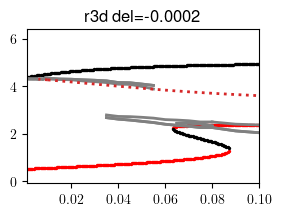

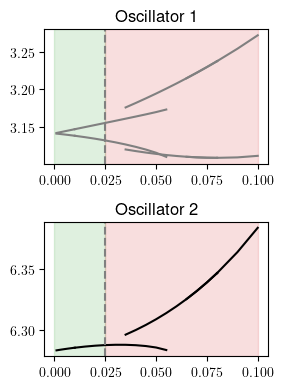

In [84]:
quick_plot_combined(a21_p0002b,
                    kw_f={'data_list':data_p0002b_list},
                    kw_r3d={'data_list':data_r3d_p0002b_list},
                    kw_r={'etup':etup21})

# del=-0.0004

In [85]:
del21_p0004b = -0.0004
a21_p0004b = nm.nmCoupling(**kw_nm, del1=del21_p0004b)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
p order=0
p order=0
p order=1
p order=1
p order=2
p order=2
p order=3
p order=3
* Loading H symbolic...
* Loading H symbolic...
* Computing H gw0, order=0...
* Computing H gw1, order=0...
* Computing H gw0, order=1...
* Computing H gw1, order=1...
* Computing H gw0, order=2...
* Computing H gw1, order=2...
* Computing H gw0, order=3...
* Computing H gw1, order=3...


### Get Branches Full

In [107]:
kw_p0004b = {'a':a21_p0004b,'del1':del21_p0004b,'recompute':False,
             'bifdir':'bif1d_gw2/', '_full_rhs':_full,'max_time':2000}

In [108]:
data_p0004b_list = []

In [109]:
in_dicts = [dict(init=4,eps_init=0.01,eps_final=0.08,deps=.005),
            dict(init=4,eps_init=0.01,eps_final=0.0005,deps=-.001),
            dict(init=2,eps_init=0.01,eps_final=0.11,deps=.01),
            dict(init=2,eps_init=0.01,eps_final=0.0009,deps=-.001)]

In [110]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0004b)
    data_p0004b_list.append(dat)

fname1 td_branch_init=4_nm=21_del=-0.0004_ei=0.01_ef=0.08_de=0.005.txt
fname2 ts_branch_init=4_nm=21_del=-0.0004_ei=0.01_ef=0.08_de=0.005.txt
fname1 td_branch_init=4_nm=21_del=-0.0004_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=-0.0004_ei=0.01_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=-0.0004_ei=0.01_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=-0.0004_ei=0.01_ef=0.11_de=0.01.txt
init [0.38603506 0.51955043 1.3555527  0.12642846 0.04707645 0.50558825 3.05395257 0.02754496 6.28888463]
eps iter 0 0.01                
t1,t2 4.53330675623119 3.121312787832203                                
periods [3.1350751  3.15091958 6.28599366]
eps iter 1 0.02                
t1,t2 4.463623569817659 3.1194448538504407                              
periods [3.12945078 3.16134116 6.29079192]
eps iter 2 0.03                
t1,t2 4.429749675162916 3.1273585693137114                              
periods [3.12462678 3.17259615 6.29722119]
eps iter 3 0.04     

In [94]:
# save hyperparameters
fname = kw_p0004b['bifdir']+'hyper_gw2_21_p0004b.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [95]:
data_r3d_p0004b_list = []

In [96]:
# find init for this branch mid
_,init = phase_lock_r3d([4,0,0],a21_p0004b,.01,_redu_3dc)
print(init)

t_diff 4.16289020834669912, Y=[ 4.16289021 -0.01540342 -0.01842466]                                              
[ 4.1629 -0.0154 -0.0184]


t_diff 4.261624397102109
[ 4.2616 -0.0147 -0.0181]


In [97]:
# f
dat = follow_locking_3d(init,a21_p0004b,(.01,.15,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0004b_list.append(dat)

eps iter 0 0.01                
t_diff 4.16289020834670109, Y=[ 4.16289021 -0.01540342 -0.01842466]                                              
eps iter 1 0.02                
t_diff 4.06217766354045611, Y=[ 4.06217766 -0.0323272  -0.03754976]                                              
eps iter 2 0.03                
t_diff 3.95906307823746113, Y=[ 3.95906308 -0.05069862 -0.05719333]                                              
eps iter 3 0.04                
t_diff 3.85931652993371511, Y=[ 3.85931653 -0.07024066 -0.07710238]                                              
eps iter 4 0.05                
t_diff 3.76944011977951210, Y=[ 3.76944012 -0.09052359 -0.09705366]                                              
eps iter 5 0.060000000000000005                
t_diff 3.69302244791331610, Y=[ 3.69302245 -0.11115925 -0.11695152]                                              
eps iter 6 0.06999999999999999                
t_diff 3.62953938117384260, Y=[ 3.62953938 -0.13193573 -0.136

In [98]:
# b
dat = follow_locking_3d(init,a21_p0004b,(.01,.005,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0004b_list.append(dat)

eps iter 0 0.01                
t_diff 4.16289020834670109, Y=[ 4.16289021 -0.01540342 -0.01842466]                                              
eps iter 1 0.009000000000000001                
t_diff 4.17268486437112250, Y=[ 4.17268486 -0.01379494 -0.01654852]                                              
eps iter 2 0.008000000000000002                
t_diff 4.18242010893569410, Y=[ 4.18242011 -0.01220175 -0.0146796 ]                                              
eps iter 3 0.007000000000000003                
t_diff 4.19209439025775410, Y=[ 4.19209439 -0.01062381 -0.01281801]                                              
eps iter 4 0.006000000000000004                
t_diff 4.20170634707320410, Y=[ 4.20170635 -0.00906107 -0.01096385]                                              


## Plot

eps_min 0.019999999999999997


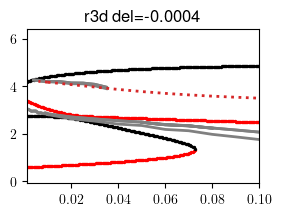

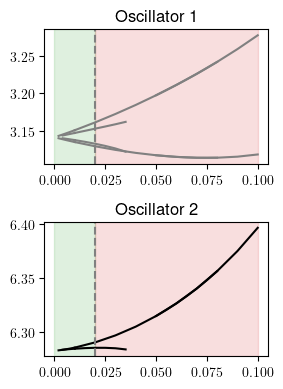

In [111]:
quick_plot_combined(a21_p0004b,
                    kw_f={'data_list':data_p0004b_list},
                    kw_r3d={'data_list':data_r3d_p0004b_list},
                    kw_r={'etup':etup21})